### 2. Adding important libraries
Let's add some important libraries


In [ ]:
#import pandas 
import pandas as pd
#import numpy 
import numpy as np
#import seaborn and matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
#import label encoder
from sklearn.preprocessing import LabelEncoder
#import  scale and normalize modules for preprocessing
from sklearn.preprocessing import scale, normalize 
#import train_test_splitter
from sklearn.model_selection import train_test_split

#import evaluation metrics
from sklearn import metrics


### Read the data
Let’s read the .csv file.

📌 Use the read_csv() function of the Pandas library.

In [ ]:
insurance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


###3. Exploratory data analysis
Then, take a look at the dataset using *data.head()* function.

In [ ]:
# Use the head() function to display the first 5 rows of the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#check columns which have any missing values
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

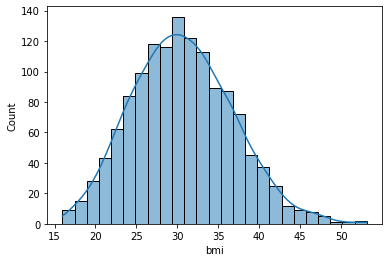

In [ ]:
#use histogram plot to analyze distribution of BMI index
sns.histplot(data=insurance, x="bmi", kde = True);
#Result comment: We can conclude that BMI index approximately normally distributed.

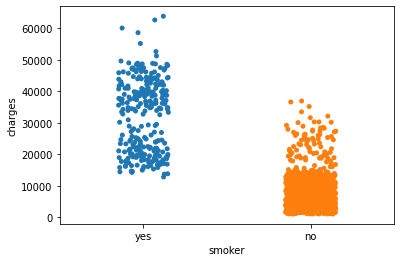

In [ ]:
#use stripplot(it can be used to analyze relation between two features if one of them is categorical ) to analyze relationship betweeen smoker and charges
sns.stripplot(data=insurance, x="smoker", y="charges", jitter =0.15);
#Result comment:  We can conclude that smoking people have more charges than non-smoking people 

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64


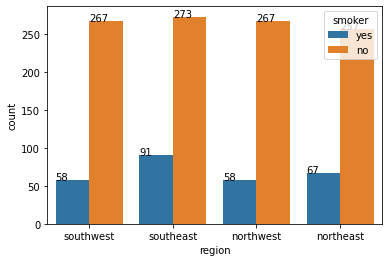

In [ ]:
#let's detect smoker count by region
smoker_count_by_region = insurance.groupby(['region', 'smoker'])['smoker'].count()
print(smoker_count_by_region)
#use countplot to analyze relationship betweeen region and and smoker
ax = sns.countplot(x='region', data=insurance, hue = "smoker");
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
#Result comment: Southeast region has more smoking and non-smoking population size related to the other regions.
#Result comment 2: Soutwest and northwest region has same smoking and non-smoking population size
#Result 3: Northeast region's non-smoking people is is the least among the regions

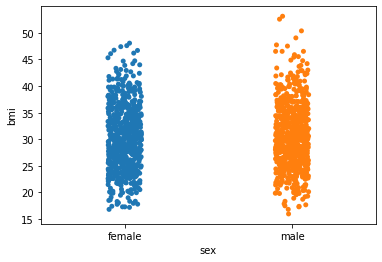

In [ ]:
#use stripplot to analyze relationship betweeen smoker and bmi index
sns.stripplot(data=insurance, x="sex", y="bmi");
# Result : Ranges for males' bmi index has more length related to females'

The region which has the most population of children is southeast


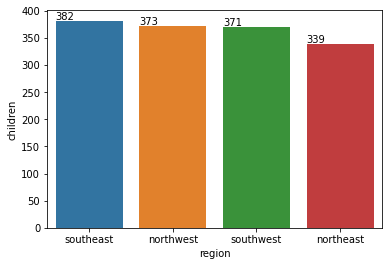

In [ ]:
#let's detect the number of children by region
most_children_regions = insurance.groupby('region')['children'].sum().sort_values(ascending = False).reset_index()
#print out the region which has the most population 
print(f"The region which has the most population of children is {most_children_regions['region'].values[0]}")
#use barplot to visualize the 
ax = sns.barplot(x='region', y='children', data=most_children_regions);
for p in ax.patches:
  ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2))
#Result comment: The descending order of the population of the regions is like southeast, northwest, southwest and northeast.

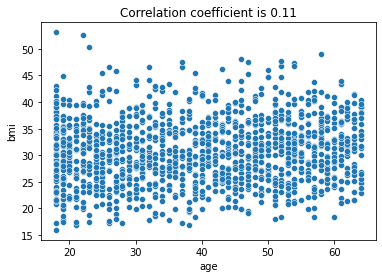

In [ ]:
#use scatterplot to analyze relationship betweeen age and bmi index
correlation_coefficient_age_bmi = insurance["age"].corr(insurance["bmi"])
correlation_coefficient_age_bmi = '{:.2f}'.format(correlation_coefficient_age_bmi)
sns.scatterplot(data = insurance, x = "age", y = "bmi").set(title='Correlation coefficient is '+str(correlation_coefficient_age_bmi));
#Result comment: Very weak correlation exist betweeen age and bmi index 

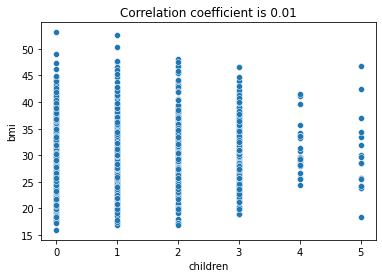

In [ ]:
#use scatterplot to analyze relationship betweeen children and bmi index
correlation_coefficient_children_bmi = insurance["children"].corr(insurance["bmi"])
correlation_coefficient_children_bmi = '{:.2f}'.format(correlation_coefficient_children_bmi)
sns.scatterplot(data = insurance, x = "children", y = "bmi").set(title='Correlation coefficient is '+str(correlation_coefficient_children_bmi));
#Result comment: Very weak correlation exist betweeen children and bmi index 

Interquartile range is : 8.3975 

********************************

Low outlier limit is 13.7, upper outlier limit is 47.290000000000006  for BMI index

****************************
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270

****************************************


Text(0.5, 1.0, 'BMI index')

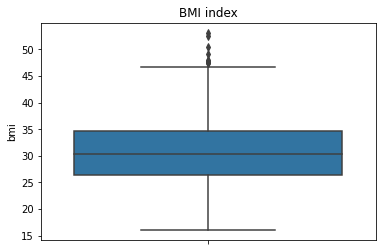

In [ ]:
#detecting outliers in bmi index
Q1 = insurance["bmi"].quantile(0.25)
Q3 = insurance["bmi"].quantile(0.75)
IQR = Q3-Q1
print(f"Interquartile range is : {IQR} \n")
print("********************************\n")
low_limit = Q1- 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(f"Low outlier limit is {low_limit}, upper outlier limit is {upper_limit}  for BMI index")
print("\n****************************")
print(insurance[(insurance["bmi"] < low_limit) | (insurance["bmi"]>upper_limit)])
print("\n****************************************")
ax = sns.boxplot(data = insurance, y = "bmi");
ax.set_title('BMI index')
#Result comment: Yes, outliers exist. In total, there are 9 outliers

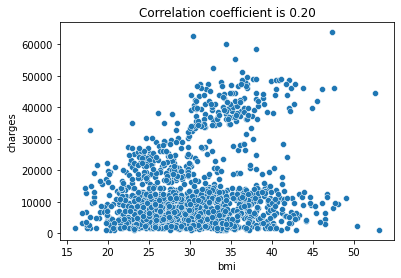

In [ ]:
#use scatterplot to analyze relationship betweeen charges and bmi index
correlation_coefficient_charges_bmi = insurance["charges"].corr(insurance["bmi"])
correlation_coefficient_charges_bmi = '{:.2f}'.format(correlation_coefficient_charges_bmi)
sns.scatterplot(data = insurance, x = "bmi", y = "charges").set(title='Correlation coefficient is '+str(correlation_coefficient_charges_bmi));
#Result comment: Weak correlation exist betweeen charges and bmi index 

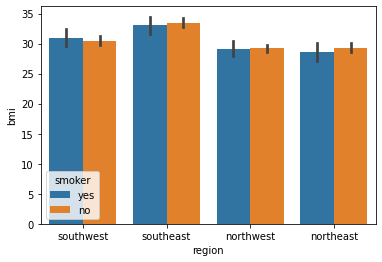

In [ ]:
#Analyzing relationship among region, bmi and smoker
ax = sns.barplot(x='region', y='bmi', hue = "smoker", data = insurance);
#Southeast region's smoking and non-smoking people have more BMI index 


### 4. Data preprocessing


In [ ]:
#Let's see our data again to detect which variables need encode
print(insurance.head(5))
print(insurance.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
#investigating which columns are categorical 
insurance_obj = insurance.select_dtypes(include='object').columns
print(insurance_obj)
#changing object type to category type
insurance[insurance_obj] = insurance[insurance_obj].astype('category')
#print out object type columns
obj_len = len(insurance.select_dtypes(include='object').columns)
print(obj_len)

Index(['sex', 'smoker', 'region'], dtype='object')
0


### Label or One-Hot Encoding?
we saw 3 categorical variables: Sex, Smoker and Region.We need transform them to numerical data which algorithms 
can understand. In order to transform we have two methods: One-hot encoding and label encoding. 

Region columns is not ordered data. For example : southeast>southwest inequality  is not logically correct. Because  there is no any distinguishing between southeast and southwest. In other words, all data types of the region column 
must be in equal weight. So we used one-hot encoding method to transform region datas.

But smoker and sex columns have only two types data(Yes/No). Moreover, types of data for smoker(Yes/No) and sex(Male/Female) differ from each other. In other words, their weight must be different in our model. So we used label 
encoding to transform sex and smoker columns.

####Label encoding for smoker and sex columns

In [ ]:
#label encoding for smoker and sex columns
label_encoder = LabelEncoder()
insurance["smoker"] = label_encoder.fit_transform(insurance["smoker"])
insurance["sex"] = label_encoder.fit_transform(insurance["sex"])
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


#### One-hot encoding for region column

In [ ]:
#one-hot encoding for region columns 
#Moreover, to escape dummy variable trap and multicollinearity problem we need get dummies and drop them by using pandas get_dummies method.
insurance = pd.get_dummies(insurance, prefix = "region", columns = ["region"], drop_first = True)
insurance


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


Interquartile range is : 11899.625365 

********************************

Low outlier limit is -13109.1508975, upper outlier limit is 34489.350562499996  for charges

****************************
139 outliers exist in total

****************************************


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


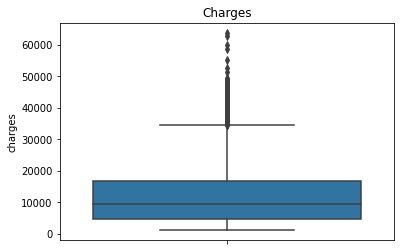

In [ ]:
#check outliers for dependent variable
Q1 = insurance["charges"].quantile(0.25)
Q3 = insurance["charges"].quantile(0.75)
IQR = Q3-Q1
print(f"Interquartile range is : {IQR} \n")
print("********************************\n")
low_limit = Q1- 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(f"Low outlier limit is {low_limit}, upper outlier limit is {upper_limit}  for charges")
print("\n****************************")
print(f"{len(insurance[(insurance['charges'] < low_limit) | (insurance['charges']>upper_limit)])} outliers exist in total")
print("\n****************************************")
ax = sns.boxplot(data = insurance, y = "charges");
ax.set_title('Charges')

#deleting outliers
insurance = insurance[(insurance['charges'] > low_limit) & (insurance['charges']< upper_limit)]
insurance

#### Feature selection

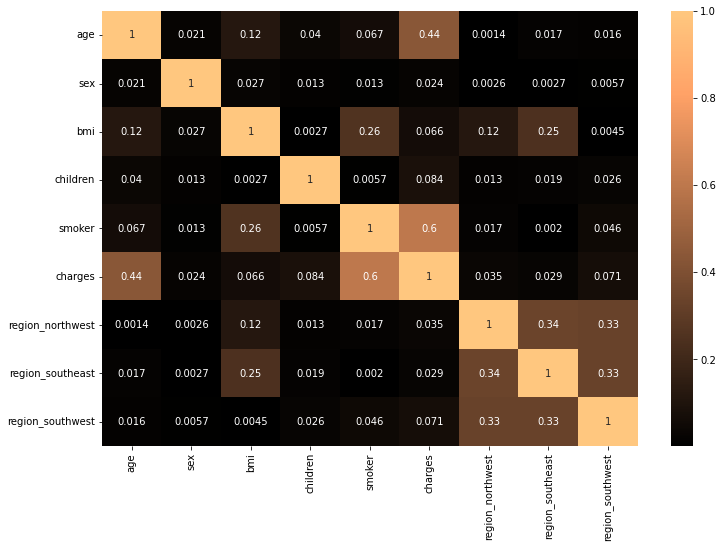

In [ ]:
#let's look at the features which affects the charges(dependent variable)
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(abs(insurance.corr()), annot = True, linewidths = 0., cmap = "copper");

In [ ]:
#Feature engineering
correlation = insurance.corr()
cor_target = abs(correlation["charges"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
feature_selection_list=relevant_features.keys().to_list()
#last regression feature list
feature_selection_list.remove('charges')
feature_selection_list

['age', 'smoker']

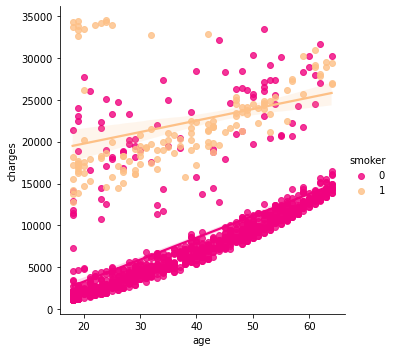

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=insurance, hue='smoker', palette='Accent_r')

##### Deleting features which have low correlation and creating variables

In [ ]:
# Create the X variable for features
X = insurance.loc[: ,feature_selection_list]

# Create the y variable for output labels
y = insurance.loc [:, "charges"]


#### Train-Test splitting

In [ ]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2)

### 5. Model Training

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(X_train,y_train)
lm_pred = lm_model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, lm_pred)
MSE=metrics.mean_squared_error(y_test, lm_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:2302.786592623556, MSE: 15944316.022435345 and RMSE: 3993.0334361779824


In [ ]:
from sklearn.svm import SVR
svr_model = SVR().fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, svr_pred)
MSE=metrics.mean_squared_error(y_test, svr_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:5302.081741935164, MSE: 51929157.41133471 and RMSE: 7206.188827066268


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
nn_model = KNeighborsRegressor().fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, nn_pred)
MSE=metrics.mean_squared_error(y_test, nn_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:3039.6258465083333, MSE: 23042755.47252008 and RMSE: 4800.28701980622


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, rf_pred)
MSE=metrics.mean_squared_error(y_test, rf_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:2468.642314919263, MSE: 17456551.674426485 and RMSE: 4178.103837200134


In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, lgbm_pred)
MSE=metrics.mean_squared_error(y_test, lgbm_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:2377.1508197422454, MSE: 16538007.672614744 and RMSE: 4066.6949323270787


In [ ]:
#!pip install catboost
from catboost import CatBoostRegressor
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)
catb_pred = catb_model.predict(X_test)

Learning rate set to 0.040673
0:	learn: 7135.7304547	total: 401us	remaining: 401ms
1:	learn: 6991.8322411	total: 1.06ms	remaining: 528ms
2:	learn: 6851.0880456	total: 1.81ms	remaining: 602ms
3:	learn: 6724.8286447	total: 2.86ms	remaining: 713ms
4:	learn: 6600.9344000	total: 3.81ms	remaining: 758ms
5:	learn: 6484.4262834	total: 4.78ms	remaining: 792ms
6:	learn: 6374.2655367	total: 5.51ms	remaining: 782ms
7:	learn: 6272.6126108	total: 6.17ms	remaining: 765ms
8:	learn: 6179.5858150	total: 7.26ms	remaining: 799ms
9:	learn: 6091.5263305	total: 7.95ms	remaining: 787ms
10:	learn: 6001.9662914	total: 9.18ms	remaining: 826ms
11:	learn: 5919.6675375	total: 10.2ms	remaining: 840ms
12:	learn: 5844.4675653	total: 10.8ms	remaining: 819ms
13:	learn: 5772.9140666	total: 11.4ms	remaining: 801ms
14:	learn: 5705.2848554	total: 12.3ms	remaining: 805ms
15:	learn: 5637.6934668	total: 13.1ms	remaining: 804ms
16:	learn: 5574.3350430	total: 13.9ms	remaining: 805ms
17:	learn: 5515.7854911	total: 15.6ms	remainin

In [ ]:
MAE= metrics.mean_absolute_error(y_test, catb_pred)
MSE=metrics.mean_squared_error(y_test, catb_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:2400.6910569086303, MSE: 16954063.694416247 and RMSE: 4117.531262105516


### We know that LM model gives the most accurate predictions. So let's try Ridge and lasso regression algorithms

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, ridge_pred)
MSE=metrics.mean_squared_error(y_test, ridge_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:2302.440061896668, MSE: 15923092.873062767 and RMSE: 3990.3750291248025


In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, lasso_pred)
MSE=metrics.mean_squared_error(y_test, lasso_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:2302.7626144689207, MSE: 15942759.35936314 and RMSE: 3992.8385090513166


Hyperparameter tuning

In [ ]:
lambdalar = 1.1**np.linspace(-1,1,100)
lambdalar

array([0.90909091, 0.91084301, 0.91259849, 0.91435735, 0.91611961,
       0.91788526, 0.91965431, 0.92142677, 0.92320265, 0.92498195,
       0.92676468, 0.92855084, 0.93034045, 0.93213351, 0.93393002,
       0.93573   , 0.93753344, 0.93934036, 0.94115077, 0.94296466,
       0.94478205, 0.94660294, 0.94842734, 0.95025525, 0.95208669,
       0.95392166, 0.95576017, 0.95760222, 0.95944782, 0.96129697,
       0.96314969, 0.96500598, 0.96686585, 0.96872931, 0.97059635,
       0.97246699, 0.97434124, 0.9762191 , 0.97810058, 0.97998569,
       0.98187443, 0.98376681, 0.98566283, 0.98756251, 0.98946586,
       0.99137287, 0.99328355, 0.99519792, 0.99711598, 0.99903773,
       1.00096319, 1.00289236, 1.00482525, 1.00676186, 1.00870221,
       1.01064629, 1.01259412, 1.01454571, 1.01650106, 1.01846017,
       1.02042306, 1.02238974, 1.0243602 , 1.02633447, 1.02831254,
       1.03029442, 1.03228012, 1.03426964, 1.036263  , 1.03826021,
       1.04026126, 1.04226617, 1.04427494, 1.04628759, 1.04830

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [ ]:
ridge_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


RidgeCV(alphas=array([0.90909091, 0.91084301, 0.91259849, 0.91435735, 0.91611961,
       0.91788526, 0.91965431, 0.92142677, 0.92320265, 0.92498195,
       0.92676468, 0.92855084, 0.93034045, 0.93213351, 0.93393002,
       0.93573   , 0.93753344, 0.93934036, 0.94115077, 0.94296466,
       0.94478205, 0.94660294, 0.94842734, 0.95025525, 0.95208669,
       0.95392166, 0.95576017, 0.95760222, 0.95944782, 0.96129697,
       0...
       1.04026126, 1.04226617, 1.04427494, 1.04628759, 1.04830411,
       1.05032452, 1.05234882, 1.05437703, 1.05640914, 1.05844518,
       1.06048513, 1.06252902, 1.06457684, 1.06662862, 1.06868434,
       1.07074403, 1.07280769, 1.07487533, 1.07694695, 1.07902256,
       1.08110218, 1.0831858 , 1.08527344, 1.0873651 , 1.08946079,
       1.09156053, 1.0936643 , 1.09577214, 1.09788403, 1.1       ]),
        normalize=True, scoring='neg_mean_squared_error')

In [ ]:
ridge_cv.alpha_

0.9090909090909091

In [ ]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train,y_train)
ridge_tuned_pred = ridge_tuned.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, ridge_tuned_pred)
MSE=metrics.mean_squared_error(y_test, ridge_tuned_pred)
RMSE= np.sqrt(MSE)
print(f"MAE:{MAE}, MSE: {MSE} and RMSE: {RMSE}")

MAE:2302.471264847369, MSE: 15924789.955690503 and RMSE: 3990.5876704679104


In [ ]:
test_pred = ridge_tuned.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
df

,Actual,Predicted
589,5976.83110,8083.151166
130,12815.44495,13227.147313
972,2527.81865,4163.916006
438,12592.53450,11512.481931
822,1621.88270,3184.107216
...,...,...
337,13937.66650,13962.003906
125,3385.39915,5143.724796
583,17626.23951,6613.437981
1312,4536.25900,7103.342376


#### Visualizing model performance

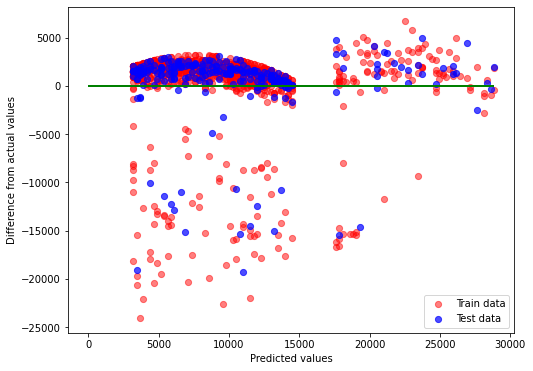

In [ ]:
train_pred = ridge_tuned.predict(X_train)
test_pred = ridge_tuned.predict(X_test)
max_prediction = max(df['Predicted'])

plt.figure(figsize=(8,6))

plt.scatter(train_pred, train_pred - y_train,
          c = 'red', marker = 'o', s = 38, alpha = 0.5,
          label = 'Train data');
plt.scatter(test_pred, test_pred - y_test,
          c = 'blue', marker = 'o', s = 38, alpha = 0.7,
          label = 'Test data');
plt.xlabel('Predicted values')
plt.ylabel('Difference from actual values')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 0, xmax = max_prediction, lw = 2, color = 'green');